# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
ds_df = pd.read_csv("ds_salaries.csv")
ds_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

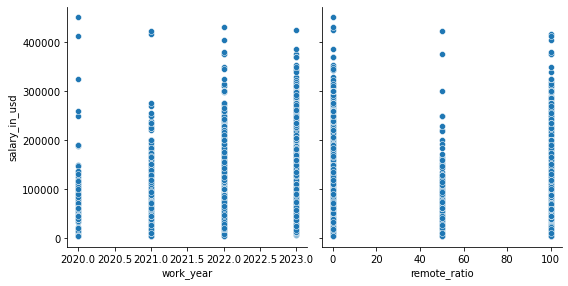

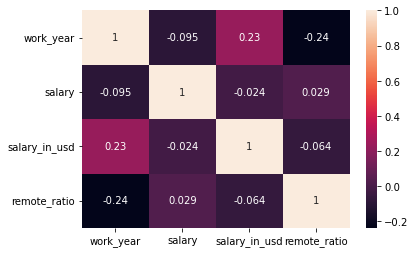

In [22]:
sns.pairplot(ds_df,x_vars=['work_year', 'remote_ratio'], 
             y_vars='salary_in_usd', height=4, aspect=1, kind='scatter')
plt.show()
sns.heatmap(ds_df.corr(), annot = True)
plt.show()
# It is harder to tell from the pair plot and a bit more clear with the heat map, but 
#it looks like salary is correlated with the work year

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [42]:
X = ds_df['work_year']
Y = ds_df['salary_in_usd']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train


import statsmodels.api as sm



X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.16e-32
Time:                        19:44:57   Log-Likelihood:                -35029.
No. Observations:                2816   AIC:                         7.006e+04
Df Residuals:                    2814   BIC:                         7.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.02e+07   3.35e+06    -12.013      0.000   -4.68e+07   -3.36e+07
work_year   1.995e+04   1654.875     12.054      0.000    1.67e+04    2.32e+04
==============================================================================
Omnibus:                      251.303   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.838
Skew:                           0.660   Prob(JB):                     9.10e-88
Kurtosis:                       4.293   Cond. No.                     5.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

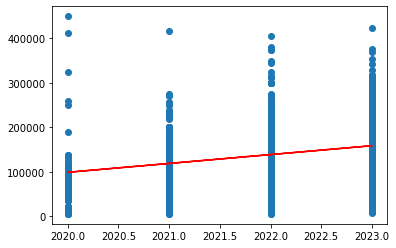

In [44]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, -40200000  + 19950*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

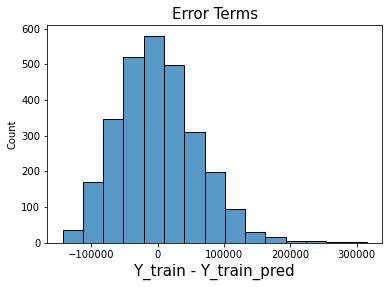

In [38]:
Y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the Y_train data and predicted Y_data
res = (Y_train - Y_train_pred)
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.049 (not very correlated). It makes sense there is a slight increase, however, because of inflation. It seems about the same amount as inflation as well (it would make an interesting analysis to see if it has kept up with the average US/GB inflation).
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? There is a slight correlation using linear analysis, but I think another model would have worked better (relationship may be better described with polynomial, etc.).
3. Was your plot of the error terms a bell curve? Yes it was